# Task 2- To explore Supervised Machine Learning

In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.

In [2]:
#importing all the pakages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [4]:
data = pd.read_csv(url)

In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
%matplotlib inline

In [7]:
plt.style.use('seaborn-dark')

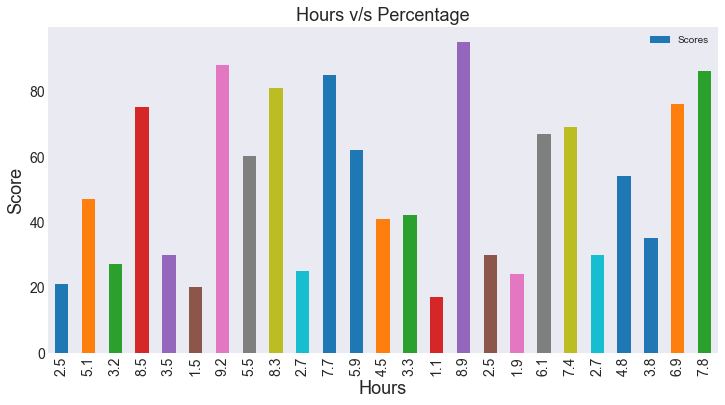

In [8]:
data.plot(x="Hours", y='Scores', kind = 'bar', figsize=(12,6), fontsize=14)
plt.title("Hours v/s Percentage", size=18)
plt.xlabel("Hours", size= 18)
plt.ylabel("Score", size= 18)
plt.show()

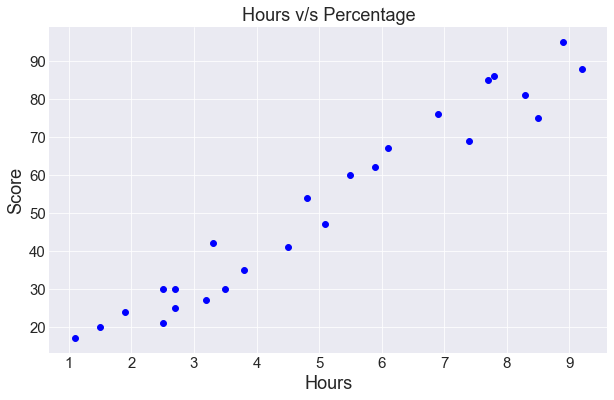

In [9]:
data.plot(x='Hours', y='Scores',s=35, kind = 'scatter', color='Blue', figsize=(10,6), fontsize=15, grid=True)
plt.title('Hours v/s Percentage', size=18)
plt.xlabel("Hours", size= 18)
plt.ylabel("Score", size= 18)
plt.show()

# Preparing data

In [10]:
x = data[["Hours"]]
y = data["Scores"]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# Train Model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [13]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(model.coef_)

[9.78856669]


In [15]:
print(model.intercept_)

2.370815382341881


In [16]:
line = model.coef_ * x + model.intercept_

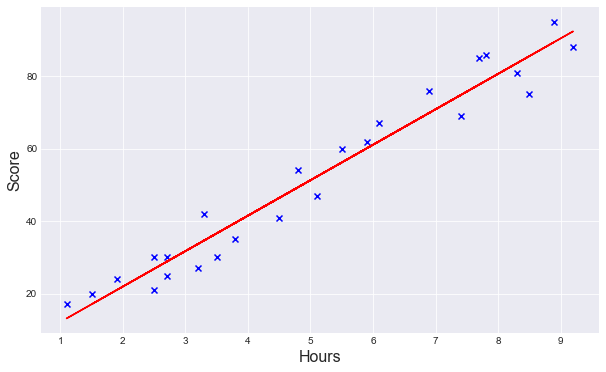

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x,y, color='blue', marker='x')
plt.plot(x, line, color='red')
plt.xlabel("Hours", size=16)
plt.ylabel("Score", size=16)
plt.grid()
plt.show()

# Prediction

In [18]:
y_pred = model.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [19]:
print(X_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8


In [20]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


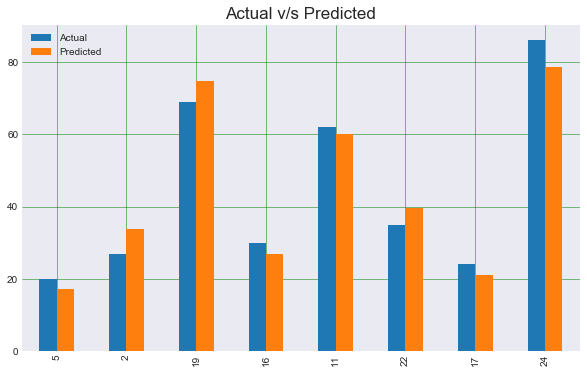

In [21]:
df.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual v/s Predicted', size=17)
plt.show()

In [22]:
hours = 8.9
test_pred = model.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score value=",test_pred[0])

No of Hours = 8.9
Predicted Score value= 89.4890588944084


In [23]:
hours = 9.25
test_pred = model.predict([[hours]])
print("No of Hours =",hours)
print("Predicted Score value=",test_pred[0])

No of Hours = 9.25
Predicted Score value= 92.91505723477056


# Evaluating the Model

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.419727808027652


In [25]:
print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

RMSE 4.792191274636315
